# Connect to G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
default_dir = "/content/drive/MyDrive/Data Preprocessing I"
os.chdir(default_dir)

# Recap: exploring data with pandas

## Hiking Dataset

In [ ]:
import pandas as pd
hiking = pd.read_json("hiking.json")
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [ ]:
hiking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length          29 non-null     object 
 5   Difficulty      25 non-null     object 
 6   Other_Details   29 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
 9   lat             0 non-null      float64
 10  lon             0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 3.1+ KB


# Missing Value Handlings

## College Dataset

### Load Dataset

In [ ]:
college = pd.read_csv("college.csv")
college.head()

,gradrat,lenroll,rmbrd,private,stufac,csat,act
0,59.0,5.1761497326,3.75,1.0,10.8,.,21.0
1,52.0,4.7791234931,3.74,1.0,17.7,.,21.0
2,75.0,6.122492809500001,.,1.0,11.4,1052.0,24.0
3,56.0,5.3181199938,4.1,1.0,11.6,940.0,23.0
4,71.0,5.631211781799999,.,1.0,18.3,.,17.0


In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  200 non-null    object 
 1   lenroll  200 non-null    object 
 2   rmbrd    200 non-null    object 
 3   private  200 non-null    float64
 4   stufac   200 non-null    object 
 5   csat     200 non-null    object 
 6   act      200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


### Detect Missing Values

In [ ]:
csat_unique = college.csat.unique()

In [ ]:
import numpy as np
np.sort(csat_unique)

array(['.', '1000.0', '1006.0', '1010.0', '1013.0', '1020.0', '1024.0',
       '1026.0', '1028.0', '1036.0', '1039.0', '1040.0', '1044.0',
       '1045.0', '1050.0', '1052.0', '1060.0', '1070.0', '1080.0',
       '1092.0', '1096.0', '1109.0', '1111.0', '1120.0', '1139.0',
       '1150.0', '1171.0', '1200.0', '1210.0', '1220.0', '1230.0',
       '1270.0', '1292.0', '1324.0', '1381.0', '741.0', '763.0', '764.0',
       '782.0', '800.0', '802.0', '810.0', '813.0', '814.0', '816.0',
       '825.0', '830.0', '832.0', '837.0', '843.0', '846.0', '850.0',
       '853.0', '854.0', '860.0', '863.0', '867.0', '871.0', '880.0',
       '881.0', '885.0', '890.0', '891.0', '895.0', '897.0', '900.0',
       '902.0', '905.0', '911.0', '917.0', '919.0', '923.0', '937.0',
       '940.0', '943.0', '947.0', '950.0', '951.0', '964.0', '970.0',
       '979.0', '980.0', '989.0', '992.0', '994.0', '996.0', '997.0',
       '998.0'], dtype=object)

### Replace Missing Values with NaN

In [ ]:
college = pd.read_csv("college.csv", na_values='.')
college.head()

,gradrat,lenroll,rmbrd,private,stufac,csat,act
0,59.0,5.176150,3.75,1.0,10.8,NaN,21.0
1,52.0,4.779123,3.74,1.0,17.7,NaN,21.0
2,75.0,6.122493,NaN,1.0,11.4,1052.0,24.0
3,56.0,5.318120,4.10,1.0,11.6,940.0,23.0
4,71.0,5.631212,NaN,1.0,18.3,NaN,17.0


In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  187 non-null    float64
 1   lenroll  199 non-null    float64
 2   rmbrd    114 non-null    float64
 3   private  200 non-null    float64
 4   stufac   199 non-null    float64
 5   csat     105 non-null    float64
 6   act      104 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


## Diabetes Dataset

### Load Dataset

In [ ]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


### Detect Missing Values

In [ ]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.BMI[diabetes.BMI == 0]

9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64

### Replace Missing Values with NaN

In [ ]:
diabetes.loc[diabetes.BMI == 0, 'BMI'] = np.nan

#### Re-check if the replacement have been done!

In [ ]:
diabetes.BMI[np.isnan(diabetes.BMI)]

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

In [ ]:
diabetes.BMI[diabetes.BMI.isna()]

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

In [ ]:
diabetes.BMI[diabetes.BMI.isnull()]

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

## Imputations: Basic techniques

### Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
diabetes_mean = pd.DataFrame(
    data=mean_imputer.fit_transform(diabetes),
    columns=diabetes.columns
)

In [ ]:
diabetes_mean

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [ ]:
diabetes_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            768 non-null    float64
 2   Diastolic_BP       768 non-null    float64
 3   Skin_Fold          768 non-null    float64
 4   Serum_Insulin      768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Class              768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


### Median Imputation

In [ ]:
median_imputer = SimpleImputer(strategy='median')
diabetes_median = pd.DataFrame(
    data=median_imputer.fit_transform(diabetes),
    columns=diabetes.columns
)

### Mode Imputation

In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
diabetes_mode = pd.DataFrame(
    data=mode_imputer.fit_transform(diabetes),
    columns=diabetes.columns
)

### Imputing a constant

In [ ]:
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
diabetes_constant = pd.DataFrame(
    data=constant_imputer.fit_transform(diabetes),
    columns=diabetes.columns
)

### Scatterplot of imputation

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
nullity = diabetes['Serum_Insulin'].isnull() + diabetes['Glucose'].isnull()

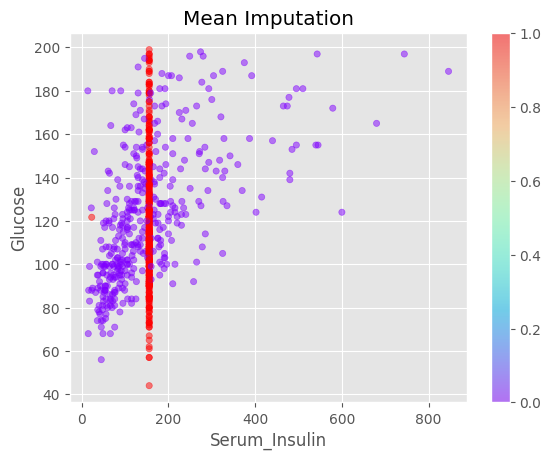

In [ ]:
diabetes_mean.plot(
    x='Serum_Insulin',
    y='Glucose',
    kind='scatter',
    alpha=0.5,
    c=nullity,
    cmap='rainbow',
    title='Mean Imputation'
);

### Visualizing Imputations

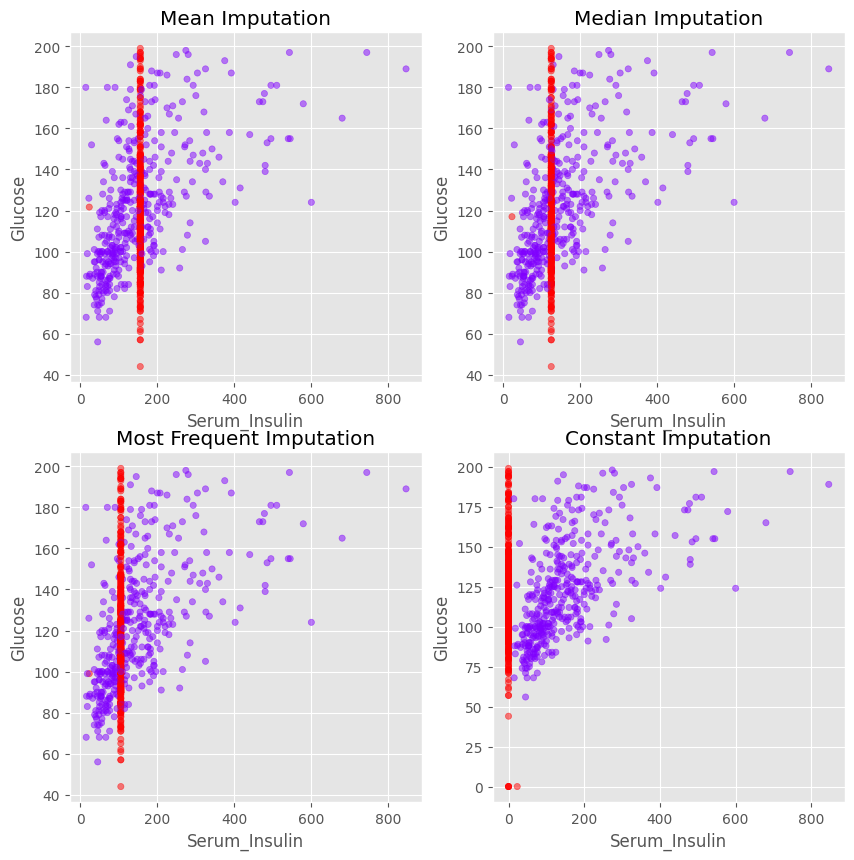

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes['Serum_Insulin'].isnull() + diabetes['Glucose'].isnull()
imputations = {
    'Mean Imputation': diabetes_mean,
    'Median Imputation': diabetes_median,
    'Most Frequent Imputation': diabetes_mode,
    'Constant Imputation': diabetes_constant
}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(
        x='Serum_Insulin',
        y='Glucose',
        kind='scatter',
        alpha=0.5,
        c=nullity,
        cmap='rainbow',
        ax=ax,
        colorbar=False, title=df_key
    )

# Label Encoder
Encoding Categorical Variables


In [ ]:
users = pd.DataFrame(
    data = {
        'user': [1, 2, 3, 4],
        'subscribed': ['y', 'n', 'n', 'y'],
        'fav_color': ['blue', 'green', 'orange', 'green'],
        'loyalty_badge': ['Gold', 'Silver', 'Silver', 'Platinum']
    })

users

,user,subscribed,fav_color,loyalty_badge
0,1,y,blue,Gold
1,2,n,green,Silver
2,3,n,orange,Silver
3,4,y,green,Platinum


## Encoding Binary Variables

### with Pandas

In [ ]:
users['subscribed']

0    y
1    n
2    n
3    y
Name: subscribed, dtype: object

In [ ]:
users["sub_enc"] = users["subscribed"].apply(lambda val: 1 if val == "y" else 0)

In [ ]:
users[["subscribed", "sub_enc"]]

,subscribed,sub_enc
0,y,1
1,n,0
2,n,0
3,y,1


### with Scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
users["sub_enc_le"] = le.fit_transform(users["subscribed"])

print(users[["subscribed", "sub_enc_le"]])

  subscribed  sub_enc_le
0          y           1
1          n           0
2          n           0
3          y           1


## Encoding Categorical - Nominal Variable

In [ ]:
le_color = LabelEncoder()
users["color_enc_le"] = le_color.fit_transform(users["fav_color"])

print(users[["fav_color", "color_enc_le"]])

  fav_color  color_enc_le
0      blue             0
1     green             1
2    orange             2
3     green             1


## Encoding Categorical - Ordinal Variable

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordered as the category rank
badge_cat = ['Silver', 'Gold', 'Platinum']
oe = OrdinalEncoder(categories=[badge_cat])

users["badge_enc_oe"] = oe.fit_transform(users[["loyalty_badge"]])
users["badge_enc_oe"] = users["badge_enc_oe"].astype('int')

print(users[["loyalty_badge", "badge_enc_oe"]])

  loyalty_badge  badge_enc_oe
0          Gold             1
1        Silver             0
2        Silver             0
3      Platinum             2


# One-Hot Encoding
To Categorical-Nominal Feature

In [ ]:
users["fav_color"]

0      blue
1     green
2    orange
3     green
Name: fav_color, dtype: object

In [ ]:
pd.get_dummies(users["fav_color"])

,blue,green,orange
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


In [ ]:
users = pd.get_dummies(users, columns = ["fav_color"])
users

,user,subscribed,loyalty_badge,sub_enc,sub_enc_le,color_enc_le,badge_enc_oe,fav_color_blue,fav_color_green,fav_color_orange
0,1,y,Gold,1,1,0,1,1,0,0
1,2,n,Silver,0,0,1,0,0,1,0
2,3,n,Silver,0,0,2,0,0,0,1
3,4,y,Platinum,1,1,1,2,0,1,0


# Standardization

## Log Normalization

In [ ]:
df = pd.DataFrame(
    data={
        "col1":[1, 1.20, 0.75, 1.60],
        "col2":[3, 45.5, 28.0, 100]
    }
)

df

,col1,col2
0,1.00,3.0
1,1.20,45.5
2,0.75,28.0
3,1.60,100.0


In [ ]:
print(df.var())

col1       0.128958
col2    1691.729167
dtype: float64


In [ ]:
df["log_2"] = np.log(df["col2"])
print(df)

   col1   col2     log_2
0  1.00    3.0  1.098612
1  1.20   45.5  3.817712
2  0.75   28.0  3.332205
3  1.60  100.0  4.605170


In [ ]:
print(df[['col1', 'log_2']].var())

col1     0.128958
log_2    2.262886
dtype: float64


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

In [ ]:
print(df_scaled)

       col1      col2     log_2
0 -0.442127 -1.154542 -1.623341
1  0.200967  0.038602  0.463854
2 -1.245995 -0.452693  0.091176
3  1.487156  1.568634  1.068311


In [ ]:
print(df_scaled.var())

col1     1.333333
col2     1.333333
log_2    1.333333
dtype: float64


# Train-test Splitting
Case: Standardized data and modeling with K-Nearest Neighbor


## Checking Missing Values

In [ ]:
diabetes_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            768 non-null    float64
 2   Diastolic_BP       768 non-null    float64
 3   Skin_Fold          768 non-null    float64
 4   Serum_Insulin      768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Class              768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


## Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = diabetes_median.iloc[:, :-1]
y = diabetes_median["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
y_train.shape, y_test.shape

((614,), (154,))

## Modeling with KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Evaluation Before & After Scaling

In [ ]:
knn.fit(X_train, y_train)
print("Accuracy - Before Scaled:", knn.score(X_test, y_test))

Accuracy - Before Scaled: 0.6753246753246753


In [ ]:
knn.fit(X_train_scaled, y_train)
print("Accuracy - After Scaled:", knn.score(X_test_scaled, y_test))

Accuracy - After Scaled: 0.7532467532467533


In [ ]:
(0.753 - 0.6753)/0.6753

0.11505997334517991